BI team screening test.




1.Assume that we have the following table, named table “PEOPLE”. This table contain the
following fields (note: the data is sample only):
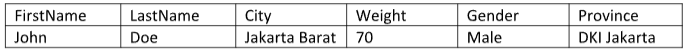


Please make a query to pull the following data:

a. List of provinces and the average weight of people in those provinces, only for provinces which average weight of people &lt; 70.

b. List top 5 people having the highest weight from each combination of province, city and gender.



Answer


**a. List of provinces and the average weight of people in those provinces, only
for provinces which average weight of people < 70:**



```
SELECT Province,
       AVG(Weight) AS Avg_Weight
FROM PEOPLE
GROUP BY Province
HAVING AVG(Weight) < 70;



b. List top 5 people having the highest weight from each combination of province, city, and gender:


```
WITH RankPeople AS (
    SELECT
        FirstName,
        LastName,
        City,
        Weight,
        Gender,
        Province,
        ROW_NUMBER() OVER (PARTITION BY Province, City, Gender ORDER BY Weight DESC) AS WeightRank
    FROM PEOPLE
)
SELECT
    FirstName,
    LastName,
    City,
    Weight,
    Gender,
    Province
FROM RankPeople
WHERE WeightRank <= 5;


2.Please refer to the additional data sheet provided:


a.Sheet loan_contracts &amp; loan_contract_ledgers have each a data table. Please examine the
data and explain what kind of information held in each of the table. Please describe as
detail as you can the info contained on each table (pointer: you can describe about what the
data is about, what’s the behavior of the data, any anomaly / inconsistency found).

LOAN_CONTRACTS:

•	contract_id: Unique ID for each loan contract.

•	created_at: Timestamp when the contract was created.

•	contract_status: The status of the contract (active, completed, cancelled).

•	tenure: The duration of the loan in months.

•	loan_amount: Loan amount.

•	provision: The cost of provision.

•	interest: The amount of interest.

•	principal: The principal amount of the loan.




>



LOAN_CONTRACT_LEDGERS:

•	ledger_id: Unique ID for each ledger record.

•	contract_id: Refer to the contract_id in LOAN_CONTRACTS.

•	created_at: Timestamp when the ledger record was created.

•	period: The payment period.

•	ledger_type: Type of ledger record (principal, interest, late_fee, restructure_down_payment).

•	ledger_status: Ledger note status (paid, unpaid, partially_paid, cancelled, waived).

•	initial_balance: The initial balance.

•	balance: Current balance.

•	due_date: Timestamp of the payment due date.

•	paid_off_date: Timestamp when the payment is paid off.



From the data provided, there are several things that are important information:

1. Most contracts have "ACTIVE" status, but there are some that are already in "PAID" status. However, it should be noted that some contracts that are already "PAID" still have ledger entries with "UNPAID" status.
Ledger Type and Status:

2. Ledgers have a type ("ledger_type") and a status ("ledger_status"). Some contracts have a ledger with "PAID" status, but some are still "UNPAID".

3. There is a "due_date" column which shows the due date, and "paid_off_date" which shows the payment date. There are some contracts that have been paid off ("PAID"), but still have a ledger with "UNPAID" status.

4. The columns "principal", "interest", "initial_balance", and "balance" indicate the financial value. Most contracts have an "UNPAID" value on the ledger, but there are some that are "PAID" but still have a value in that column.

5. In some cases, the ledger with the status "PAID" still has values in the "balance" and "interest" columns, which should be zero after repayment and in the 'PROVISION' and 'INTEREST' columns there are many 0 values

#**IMPORT LIBRARY**#

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**IMPORT DATA**#

In [31]:
data1 = pd.read_excel('BI Test.xlsx', sheet_name='loan_contracts')

In [32]:
data1

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,2020-07-20T03:59:54.196,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,2020-07-20T06:25:04.957,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,2020-07-20T07:57:41.168,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,2020-07-20T09:29:54.100,ACTIVE,4,3017500,500.0,0.0,3018000.0
...,...,...,...,...,...,...,...,...
95,bmmv1,2020-07-20T05:22:16.253,FINISHED,3,3000000,900549.6,639950.4,3900549.6
96,sgzag,2020-07-20T04:48:10.818,FINISHED,3,3000000,900549.6,639950.4,3900549.6
97,ujcr5,2020-07-20T05:04:14.907,FINISHED,3,3000000,900549.6,639950.4,3900549.6
98,aw1fx,2020-07-20T04:14:44.416,FINISHED,3,3000000,900549.6,639950.4,3900549.6


In [33]:
data1.isnull().sum()

contract_id        0
created_at         0
contract_status    0
tenure             0
loan_amount        0
provision          0
interest           0
principal          0
dtype: int64

In [34]:
data2 = pd.read_excel('BI Test.xlsx', sheet_name='loan_contract_ledgers')

In [ ]:
data2

,ledger_id,contract_id,created_at,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,k27dvsq,0b8gm,2020-09-23T17:08:11.588,2,LATE_FEE,PAID,35000.0,0.0,2020-09-20T16:59:59.999,2020-09-25T02:54:24
1,ezj0qkd,0b8gm,2020-07-20T01:30:51.973,1,INTEREST,PAID,0.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
2,leg2glb,0b8gm,2020-07-20T01:30:51.973,1,PRINCIPAL,PAID,293000.0,0.0,2020-08-20T16:59:59.999,2020-08-26T02:33:40
3,epk2d63,0b8gm,2020-07-20T01:30:51.973,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.999,NaN
4,k8eb4f1,0b8gm,2020-07-20T01:30:51.973,4,PRINCIPAL,UNPAID,293000.0,293000.0,2020-11-20T16:59:59.999,NaN
...,...,...,...,...,...,...,...,...,...,...
1092,d2gxgtz,zsma4,2020-07-20T06:51:38.743,2,INTEREST,UNPAID,155000.0,155000.0,2020-09-20T16:59:59.000,NaN
1093,dem1vsg,zsma4,2020-07-20T06:51:38.743,2,PRINCIPAL,UNPAID,931500.0,931500.0,2020-09-20T16:59:59.000,NaN
1094,th4tsle,zsma4,2020-07-20T06:51:38.743,3,INTEREST,UNPAID,80480.0,80480.0,2020-10-20T16:59:59.000,NaN
1095,w3argec,zsma4,2020-07-20T06:51:38.743,3,PRINCIPAL,UNPAID,1006020.0,1006020.0,2020-10-20T16:59:59.000,NaN


#**MERGE DATA & DATA CLEANING**#

In [36]:
data = data1.merge(data2, on='contract_id', how='left')

In [37]:
data

,contract_id,created_at_x,contract_status,tenure,loan_amount,provision,interest,principal,ledger_id,created_at_y,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0,3d6wm3j,2020-09-23T17:07:25.039,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20T16:59:59.999,NaN
1,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0,ixqd3zu,2020-07-20T03:17:26.395,4,PRINCIPAL,UNPAID,666500.0,666500.0,2020-11-20T16:59:59.000,NaN
2,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0,obj28qb,2020-07-20T03:17:26.395,4,INTEREST,UNPAID,0.0,0.0,2020-11-20T16:59:59.000,NaN
3,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0,gtg7hkd,2020-07-20T03:17:26.395,1,PRINCIPAL,UNPAID,666500.0,666500.0,2020-08-20T16:59:59.000,NaN
4,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0,p3pnbrk,2020-07-20T03:17:26.395,1,INTEREST,UNPAID,0.0,0.0,2020-08-20T16:59:59.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,46vj4,2020-07-20T11:47:39.332,ACTIVE,3,3000000,900549.6,639950.4,3900549.6,fzsbyj1,2020-07-20T11:47:39.335,1,PRINCIPAL,PAID,1201500.0,0.0,2020-08-20T16:59:59.000,2020-08-20T13:13:35
1093,46vj4,2020-07-20T11:47:39.332,ACTIVE,3,3000000,900549.6,639950.4,3900549.6,l5mdowp,2020-07-20T11:47:39.335,2,INTEREST,PAID,215880.0,0.0,2020-09-20T16:59:59.000,2020-09-20T00:45:13
1094,46vj4,2020-07-20T11:47:39.332,ACTIVE,3,3000000,900549.6,639950.4,3900549.6,cdgwj16,2020-07-20T11:47:39.335,2,PRINCIPAL,PAID,1297620.0,0.0,2020-09-20T16:59:59.000,2020-09-20T00:45:13
1095,46vj4,2020-07-20T11:47:39.332,ACTIVE,3,3000000,900549.6,639950.4,3900549.6,0gtmp7w,2020-07-20T11:47:39.335,3,INTEREST,UNPAID,112070.4,112070.4,2020-10-20T16:59:59.000,NaN


In [38]:
data.isnull().sum()

contract_id          0
created_at_x         0
contract_status      0
tenure               0
loan_amount          0
provision            0
interest             0
principal            0
ledger_id            0
created_at_y         0
period               0
ledger_type          0
ledger_status        0
initial_balance      0
balance              0
due_date             0
paid_off_date      811
dtype: int64

there are 811 empty data in paid_off_date, but we will just ignore it because it's possible that people haven't paid their bills so it's empty

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   contract_id      1097 non-null   object 
 1   created_at_x     1097 non-null   object 
 2   contract_status  1097 non-null   object 
 3   tenure           1097 non-null   int64  
 4   loan_amount      1097 non-null   int64  
 5   provision        1097 non-null   float64
 6   interest         1097 non-null   float64
 7   principal        1097 non-null   float64
 8   ledger_id        1097 non-null   object 
 9   created_at_y     1097 non-null   object 
 10  period           1097 non-null   int64  
 11  ledger_type      1097 non-null   object 
 12  ledger_status    1097 non-null   object 
 13  initial_balance  1097 non-null   float64
 14  balance          1097 non-null   float64
 15  due_date         1097 non-null   object 
 16  paid_off_date    286 non-null    object 
dtypes: float64(5),

In [40]:
# change data type to datetime
data['created_at_x'] = pd.to_datetime(data['created_at_x'], format='%Y-%m-%d %H:%M:%S.%f')
data['created_at_y'] = pd.to_datetime(data['created_at_y'], format='%Y-%m-%d %H:%M:%S.%f')
data['due_date'] = pd.to_datetime(data['due_date'], format='%Y-%m-%d %H:%M:%S.%f')
data['paid_off_date'] = pd.to_datetime(data['paid_off_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

data['created_at_x'] = data['created_at_x'].apply(lambda x: x.replace(second=0, microsecond=0))
data['created_at_y'] = data['created_at_y'].apply(lambda x: x.replace(second=0, microsecond=0))
data['due_date'] = data['due_date'].apply(lambda x: x.replace(second=0, microsecond=0))
data['paid_off_date'] = data['paid_off_date'].apply(lambda x: x.replace(second=0, microsecond=0) if pd.notnull(x) else x)

In [41]:
data.head()

,contract_id,created_at_x,contract_status,tenure,loan_amount,provision,interest,principal,ledger_id,created_at_y,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,0.0,0.0,3332500.0,3d6wm3j,2020-09-23 17:07:00,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20 16:59:00,NaT
1,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,0.0,0.0,3332500.0,ixqd3zu,2020-07-20 03:17:00,4,PRINCIPAL,UNPAID,666500.0,666500.0,2020-11-20 16:59:00,NaT
2,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,0.0,0.0,3332500.0,obj28qb,2020-07-20 03:17:00,4,INTEREST,UNPAID,0.0,0.0,2020-11-20 16:59:00,NaT
3,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,0.0,0.0,3332500.0,gtg7hkd,2020-07-20 03:17:00,1,PRINCIPAL,UNPAID,666500.0,666500.0,2020-08-20 16:59:00,NaT
4,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,0.0,0.0,3332500.0,p3pnbrk,2020-07-20 03:17:00,1,INTEREST,UNPAID,0.0,0.0,2020-08-20 16:59:00,NaT


In the provision and interest columns there are lots of values of 0. So I want to fill them in using the mean, because it is impossible for provision and interest to have a value of 0.

In [44]:
data['provision'] = data['provision'].replace(0, data['provision'].mean())
data['interest'] = data['interest'].replace(0, data['interest'].mean())

In [45]:
# round numbers
data['provision'] = data['provision'].round(2).astype(int)
data['interest'] = data['interest'].round(2).astype(int)

In [46]:
data

,contract_id,contract_created,contract_status,tenure,loan_amount,provision,interest,principal,ledger_id,ledger_created,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,3d6wm3j,2020-09-23 17:07:00,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20 16:59:00,NaT
1,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,ixqd3zu,2020-07-20 03:17:00,4,PRINCIPAL,UNPAID,666500.0,666500.0,2020-11-20 16:59:00,NaT
2,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,obj28qb,2020-07-20 03:17:00,4,INTEREST,UNPAID,0.0,0.0,2020-11-20 16:59:00,NaT
3,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,gtg7hkd,2020-07-20 03:17:00,1,PRINCIPAL,UNPAID,666500.0,666500.0,2020-08-20 16:59:00,NaT
4,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,p3pnbrk,2020-07-20 03:17:00,1,INTEREST,UNPAID,0.0,0.0,2020-08-20 16:59:00,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,46vj4,2020-07-20 11:47:00,ACTIVE,3,3000000,900549,639950,3900549.6,fzsbyj1,2020-07-20 11:47:00,1,PRINCIPAL,PAID,1201500.0,0.0,2020-08-20 16:59:00,2020-08-20 13:13:00
1093,46vj4,2020-07-20 11:47:00,ACTIVE,3,3000000,900549,639950,3900549.6,l5mdowp,2020-07-20 11:47:00,2,INTEREST,PAID,215880.0,0.0,2020-09-20 16:59:00,2020-09-20 00:45:00
1094,46vj4,2020-07-20 11:47:00,ACTIVE,3,3000000,900549,639950,3900549.6,cdgwj16,2020-07-20 11:47:00,2,PRINCIPAL,PAID,1297620.0,0.0,2020-09-20 16:59:00,2020-09-20 00:45:00
1095,46vj4,2020-07-20 11:47:00,ACTIVE,3,3000000,900549,639950,3900549.6,0gtmp7w,2020-07-20 11:47:00,3,INTEREST,UNPAID,112070.4,112070.4,2020-10-20 16:59:00,NaT


Change the column names in created_at_x and created_at_y

In [42]:
data.rename(columns={'created_at_x' : 'contract_created',
                     'created_at_y' : 'ledger_created'}, inplace='True')

In [47]:
data.head()

,contract_id,contract_created,contract_status,tenure,loan_amount,provision,interest,principal,ledger_id,ledger_created,period,ledger_type,ledger_status,initial_balance,balance,due_date,paid_off_date
0,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,3d6wm3j,2020-09-23 17:07:00,2,LATE_FEE,UNPAID,315000.0,315000.0,2020-09-20 16:59:00,NaT
1,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,ixqd3zu,2020-07-20 03:17:00,4,PRINCIPAL,UNPAID,666500.0,666500.0,2020-11-20 16:59:00,NaT
2,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,obj28qb,2020-07-20 03:17:00,4,INTEREST,UNPAID,0.0,0.0,2020-11-20 16:59:00,NaT
3,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,gtg7hkd,2020-07-20 03:17:00,1,PRINCIPAL,UNPAID,666500.0,666500.0,2020-08-20 16:59:00,NaT
4,w7azu,2020-07-20 03:17:00,ACTIVE,5,3332500,113328,69885,3332500.0,p3pnbrk,2020-07-20 03:17:00,1,INTEREST,UNPAID,0.0,0.0,2020-08-20 16:59:00,NaT


#**RUNNING SQL ON PYTHON**#

In [11]:
import sqlite3


In [12]:
conn = sqlite3.connect(':memory:')

In [13]:
data.to_sql('data',conn, index=False, if_exists='replace')

1097

b.	Assuming there is no late payment or loan restructure, please create a SQL code to produce the expected repayment amount from each principal & interest in the month of Aug, Sept & Oct. Please show the report output as well

In [28]:
query = """
SELECT
    ledger_type,
    SUM(CASE WHEN SUBSTR(due_date, 6, 2) = '08' THEN principal ELSE 0 END) AS total_expected_principal_payment_august,
    SUM(CASE WHEN SUBSTR(due_date, 6, 2) = '08' THEN interest ELSE 0 END) AS total_expected_interest_payment_august,
    SUM(CASE WHEN SUBSTR(due_date, 6, 2) = '09' THEN principal ELSE 0 END) AS total_expected_principal_payment_september,
    SUM(CASE WHEN SUBSTR(due_date, 6, 2) = '09' THEN interest ELSE 0 END) AS total_expected_interest_payment_september
FROM data
WHERE SUBSTR(due_date, 6, 2) IN ('08', '09') AND ledger_status = 'UNPAID'
GROUP BY ledger_type;
"""

# Eksekusi query menggunakan pandas
result = pd.read_sql_query(query, conn)
result

,ledger_type,total_expected_principal_payment_august,total_expected_interest_payment_august,total_expected_principal_payment_september,total_expected_interest_payment_september
0,INTEREST,128257540.0,3295050,166497060.0,4663035
1,LATE_FEE,120309040.0,3155280,159668560.0,4593150
2,PRINCIPAL,117520540.0,3155280,162578560.0,4523265


c.	Please create a SQL code to display LateFee amount which has been waived for each contract status.

In [27]:
query1 = """
SELECT
    contract_status,
    SUM(interest) AS total_waived_late_fee
FROM
    data
WHERE
    ledger_type = 'LATE_FEE' AND ledger_status = 'WAIVED'
GROUP BY
    contract_status;
"""
result1 = pd.read_sql(query1, conn)
result1

,contract_status,total_waived_late_fee
0,ACTIVE,419310
1,FINISHED,139770


d.	Given this data, what kind of analysis & insight which you can provide (please feel free to explore the given data)

#**DESCRIPTIVE ANALYSIS**#

In [ ]:
data.describe()

,tenure,loan_amount,provision,interest,principal,period,initial_balance,balance
count,1097.000000,1.097000e+03,1097.000000,1097.000000,1.097000e+03,1097.000000,1.097000e+03,1.097000e+03
mean,5.321787,2.836689e+06,119940.588879,129960.265269,2.950002e+06,2.995442,3.081673e+05,2.194464e+05
std,1.214800,1.726944e+06,280219.240445,154653.395495,1.715641e+06,1.662428,3.683292e+05,3.322136e+05
min,2.000000,2.500000e+05,250.000000,69885.000000,2.520000e+05,1.000000,0.000000e+00,0.000000e+00
25%,5.000000,1.756750e+06,500.000000,69885.000000,1.757500e+06,2.000000,0.000000e+00,0.000000e+00
50%,6.000000,2.213000e+06,1500.000000,69885.000000,2.787000e+06,3.000000,2.158800e+05,0.000000e+00
75%,6.000000,3.566500e+06,2500.000000,69885.000000,3.771000e+06,4.000000,4.750000e+05,3.370000e+05
max,6.000000,9.360500e+06,900549.000000,639950.000000,9.363000e+06,6.000000,2.067500e+06,2.067500e+06


1. The average loan duration is around 5 months, with most contracts having a duration of 5 to 6 months.
2. The average loan amount is around 2,836,689 with a fairly large standard deviation, indicating significant variation in loan amounts.
3. Loan amounts ranged from 250,000 to 9,360,500, with most contracts falling in the range of 1,756,750 to 3,566,500.
4. The average provision fee was approximately 119,940.59, with considerable variation.
5. Most contracts have provision fees between 500 and 2,500, but there are some that have much higher provision fees.
6. The average interest is approximately 129,960.27, with a significant standard deviation.
7. The minimum value of interest is 69,885, and most contracts have interest around that value.
8. The average principal amount is around 2,950,002, with significant variation.
There are some contracts that have principal amounts above 3 million.
9. The average initial balance is about 308,167.30, and the average current balance is about 219,446.40.


#**TENOR DISTRIBUTION**#

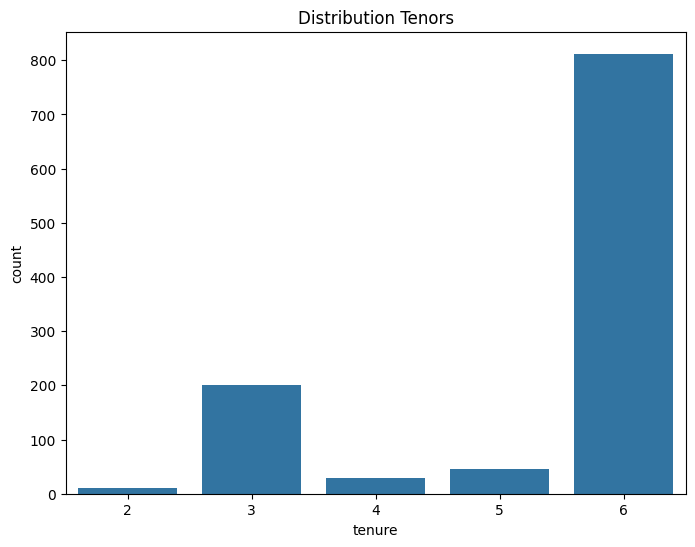

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='tenure', data=data)
plt.title('Distribution Tenors')
plt.show()

It shows that 6-month tenors are the most preferred, as 6-month tenors provide monthly instalment payments that may be more affordable for many followed by 3-month, 5-month, and 4-month tenors.

The 2-month tenor was the least preferred, a preference that may indicate a tendency for borrowers to choose relatively short repayment periods, perhaps due to temporary financial needs or to avoid long-term liabilities or high interest fees.

#**DISTRIBUTION CONTRACT STATUS**#

<ipython-input-22-0ceefb28b1a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contract_status', data=data, palette='Set2')


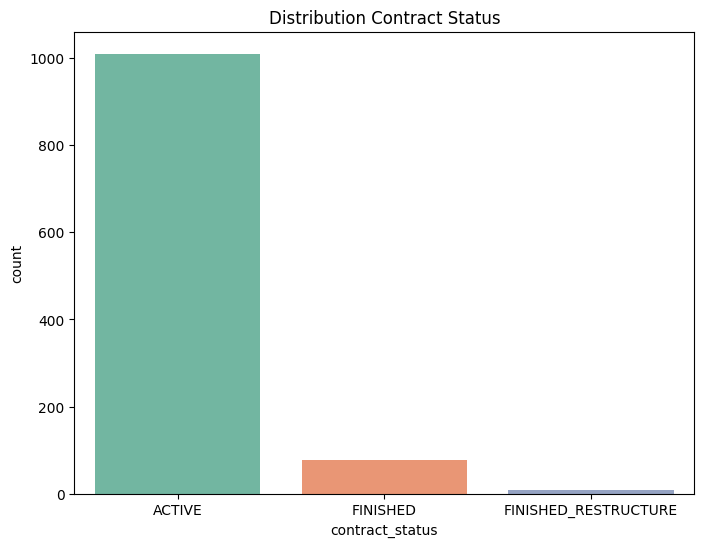

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Status Kontrak
plt.figure(figsize=(8, 6))
sns.countplot(x='contract_status', data=data, palette='Set2')
plt.title('Distribution Contract Status')
plt.show()


In the results of the contract status visualisation, it can be seen that "ACTIVE" status dominates with the highest number, followed by "FINISHED" and finally "FINISHED RESTRUCTURE". This indicates that most of the contracts are still active. The existence of "FINISHED RESTRUCTURE" status indicates that some contracts that underwent restructuring or certain changes have been completed in that period.

#**DISTRIBUTION LEDGER STATUS**#

<ipython-input-108-b916b856451b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ledger_status', data=data, palette='Set1')


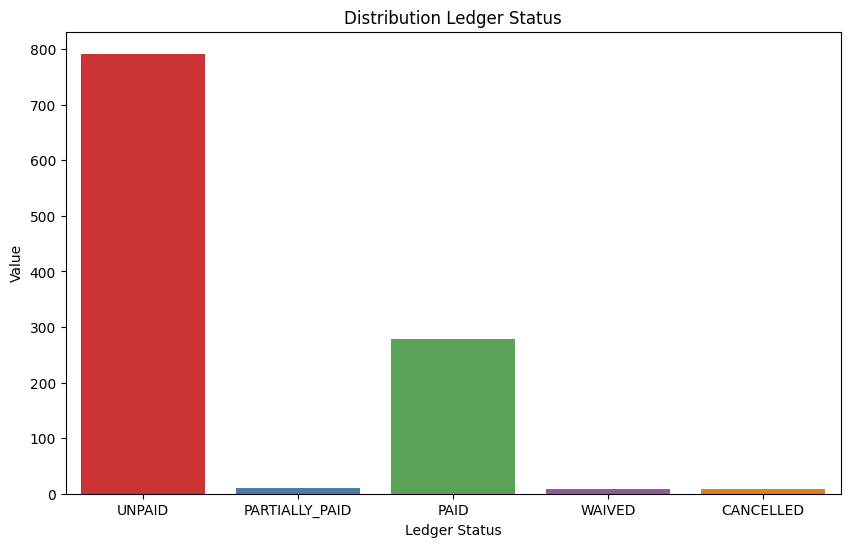

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ledger_status', data=data, palette='Set1')
plt.title('Distribution Ledger Status')
plt.xlabel('Ledger Status')
plt.ylabel('Value')
plt.show()

The vast majority of entities or transactions are still in the "UNPAID" category, which are unresolved financial responsibilities. When compared to the people who have paid, it does not reach half of the people who have not yet paid.


#**HOW THE NUMBER OF PAYMENTS AND LATE PAYMENTS FOR EACH PERIOD?**#

<Figure size 1500x1200 with 0 Axes>

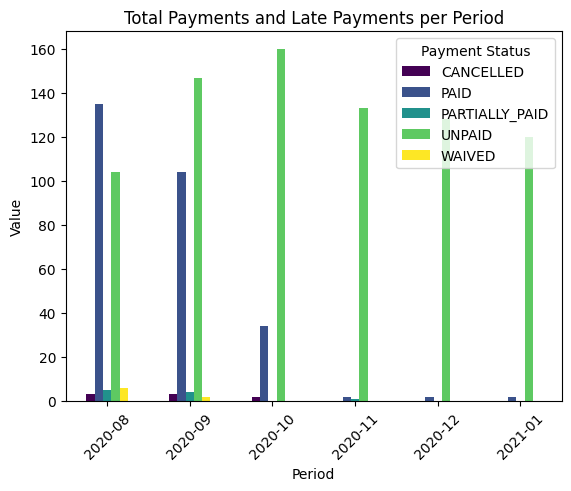

In [ ]:
# Added 'payment_period' column to extract month and year from payment date
data['payment_period'] = data['due_date'].dt.to_period('M')

# Calculate the number of payments and delays per period
payment_counts = data['ledger_status'].groupby(data['payment_period']).value_counts().unstack().fillna(0)

plt.figure(figsize=(15, 12))
payment_counts.plot(kind='bar', colormap='viridis')
plt.title('Total Payments and Late Payments per Period')
plt.xlabel('Period')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Payment Status')
plt.show()

Based on the visualisation results, it can be seen that the number of people making payments has decreased over time. This phenomenon can be interpreted as an indicator that there is a decline in people's ability to make payments over time.

The fact that the number of people who did not make payments peaked at month 10 is interesting. This could be due to factors such as economic instability, policy changes, or other factors that affect people's ability or willingness to pay in that month.

#**PERCENTAGE OF REPAYMENT BASED ON DURATION OF TENURE?**#

<Figure size 1200x800 with 0 Axes>

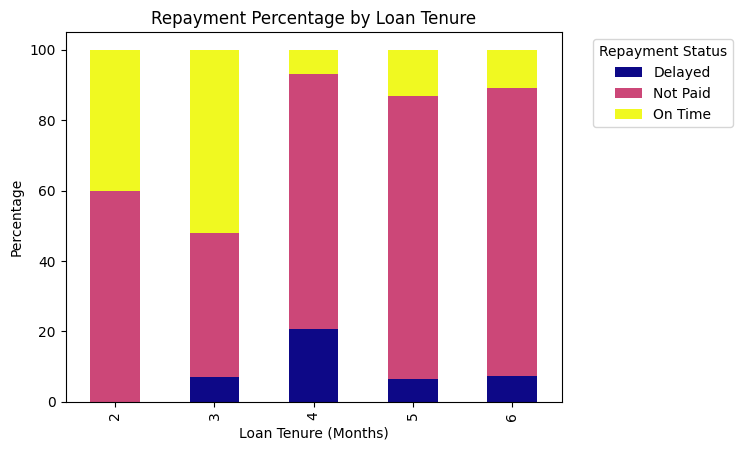

In [54]:
repayment_percentage = data.groupby('tenure')['payment_category'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotting
plt.figure(figsize=(12, 8))
repayment_percentage.plot(kind='bar', stacked=True, cmap='plasma')
plt.title('Repayment Percentage by Loan Tenure')
plt.xlabel('Loan Tenure (Months)')
plt.ylabel('Percentage')
plt.legend(title='Repayment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The 6-month tenure stands out with the highest percentage of non-payment, indicating that some borrowers may find it difficult or reluctant to repay over a longer period of time. Potential causes may involve factors such as changes in personal finances or lack of ability to make long-term commitments or interest rates that are too high.

In comparison, shorter tenors such as 2 months stand out as the tenors with the highest percentage of repayments. Then 3-month tenors despite higher non-payment rates. This phenomenon can be interpreted as a positive response to shorter options, perhaps because borrowers feel more confident or able to repay the loan in a shorter period of time.

#**HOW THE LOAN AMOUNT IS DISTRIBUTED?**#

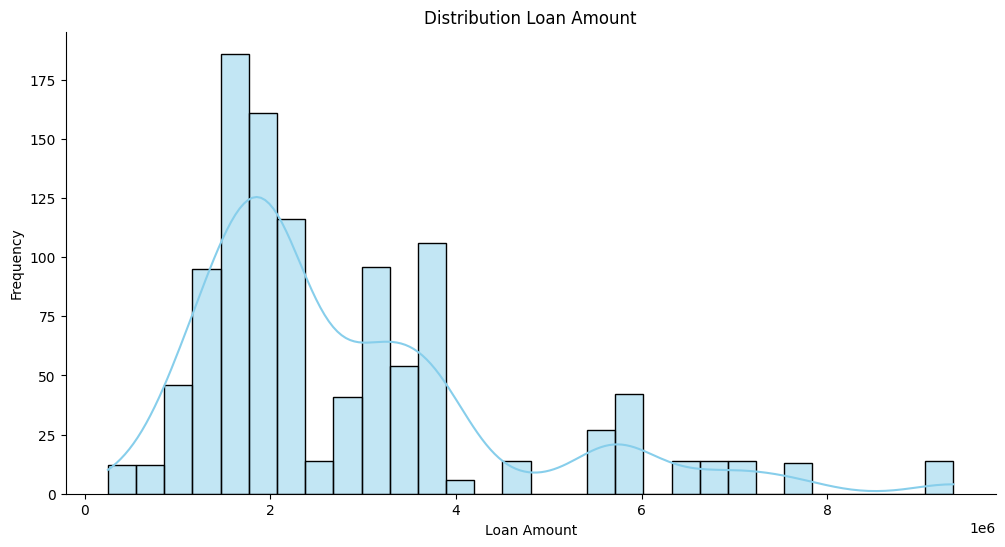

In [49]:
# Visualisasi distribusi loan amount
plt.figure(figsize=(12, 6))
sns.histplot(data['loan_amount'], kde=True, color='skyblue', bins=30)
plt.title('Distribution Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


The visualisation shows that the distribution is skewed to the right, with most loans clustered around smaller values. Interestingly, the highest frequencies are located around the value of 2 million, indicating that most loans are centred in this category. Although the average is generally smaller, the presence of high frequencies around 2 million could be an indication that most borrowers are opting for loans with lower values, while there are a small number of loans that have much larger values.

#**CONTRACT STATUS VS LOAN AMOUNT**#

<ipython-input-26-96ed65d6694a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='loan_amount', y='contract_status', inner='box', palette='Dark2')


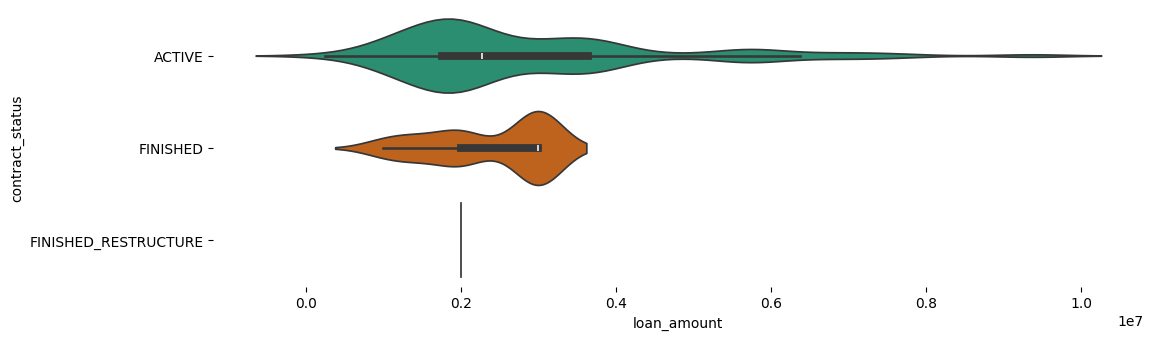

In [ ]:
figsize = (12, 1.2 * len(data['contract_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='loan_amount', y='contract_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The relationship between loan amount and contract status, we used violin plot as a visualisation tool. The results show the different distributional characteristics of 'Active' and 'Finished' contract statuses.

In the 'Active' contract status, the loan amount distribution creates a diffuse violin pattern. This indicates a wide variation in loan amounts for ongoing contracts, with some contracts having loan amounts that are much higher or lower than the median.

On the other hand, in the 'Completed' contract status, the violin pattern depicts that the values of some of these contracts tend to converge at a lower range. In other words, completed contracts tend to have lower loan amounts compared to active contracts.

This requires further analysis

#**CONTRACT STATUS VS TENUR**#

<ipython-input-113-02a869daf1d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='tenure', y='contract_status', inner='box', palette='Dark2')


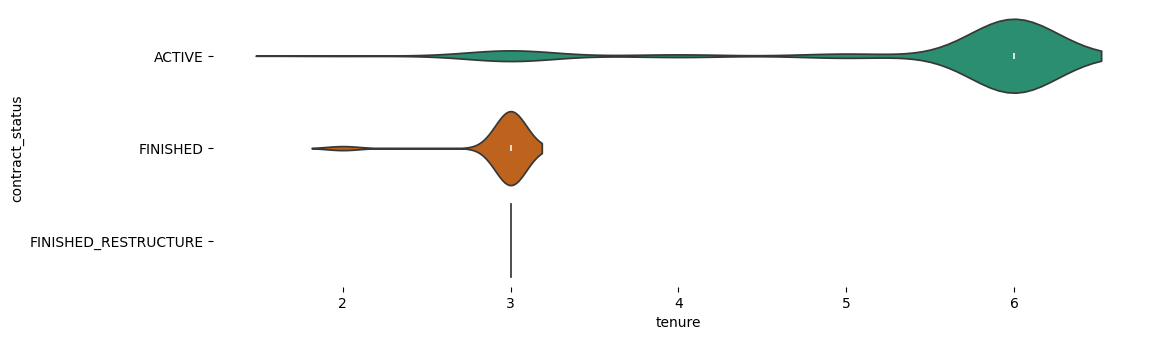

In [ ]:
figsize = (12, 1.2 * len(data['contract_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='tenure', y='contract_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In the continued analysis of contract status, patterns were found that illustrate the characteristics of each contract tenure. The distribution of tenure under 'Active' contract status shows a wide spread, with a median value of 6. This means that ongoing contracts tend to have varying lengths, with some contracts having longer tenures. This may be a factor in why many contracts are still active.

On the other hand, the tenure distribution on 'Finished' contract status shows a spread from 2 to 3, with the median value at 3. This indicates that most of the completed contracts have a shorter tenure, and most of the tenure values are clustered in the lower range. This skew illustrates that completed contracts tend to have shorter loan durations.

#**WHAT IS THE DISTRIBUTION OF INTEREST?**#

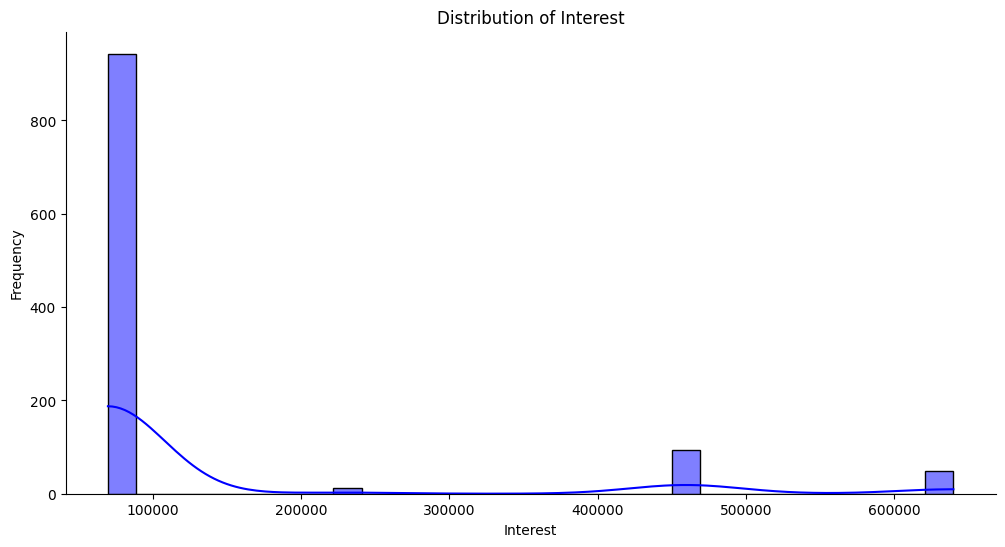

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['interest'], bins=30, kde=True, color='blue')
plt.title('Distribution of Interest')
plt.xlabel('Interest')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

The majority of contracts have an interest of less than 100000

#**CUSTOMER SEGMENTATION**#

In [50]:
data['days_delayed'] = (data['paid_off_date'] - data['due_date']).dt.days


In [51]:
def payment_category(row):
    if pd.notnull(row['paid_off_date']):
        if row['days_delayed'] <= 0:
            return 'On Time'
        else:
            return 'Delayed'
    else:
        return 'Not Paid'

data['payment_category'] = data.apply(payment_category, axis=1)


In [52]:
def customer_segmentation(row):
    if row['payment_category'] == 'On Time':
        return 'Good Payers'
    elif row['payment_category'] == 'Delayed':
        return 'Late Payers'
    else:
        return 'Non-Payers'

data['customer_segment'] = data.apply(customer_segmentation, axis=1)


<ipython-input-53-18284f63802e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


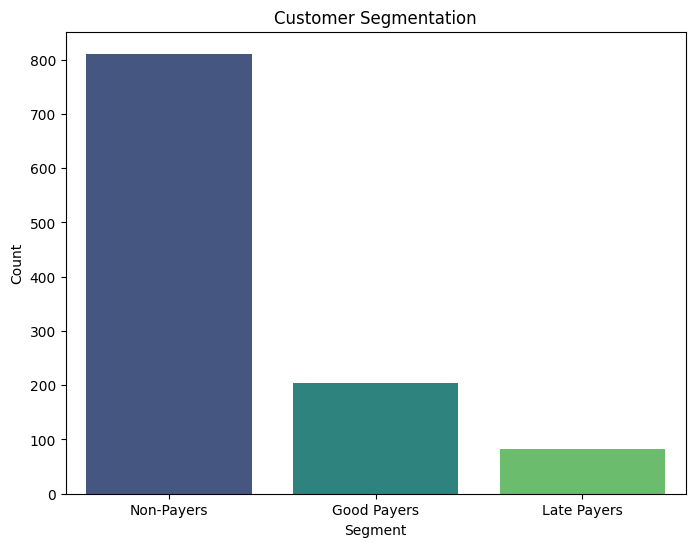

In [53]:
segment_counts = data['customer_segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


In [ ]:
segment_counts

Non-Payers     811
Good Payers    204
Late Payers     82
Name: customer_segment, dtype: int64

In [ ]:
segment_stats = data.groupby('customer_segment').agg({'loan_amount': 'mean', 'tenure': 'median', 'interest': 'mean'})
payment_status_cross = pd.crosstab(data['customer_segment'], data['ledger_status'])
print(segment_stats)


                   loan_amount  tenure       interest
customer_segment                                     
Good Payers       2.199559e+06     3.0  290292.352941
Late Payers       2.277918e+06     6.0   98391.951220
Non-Payers        3.053451e+06     6.0   92821.986436


Based on the data analysis, we can describe some characteristics of each customer segment. Good payers, the average loan amount in this segment is about 2.2 million, with an average tenor of 3 months, and an interest of about 290 thousand.

On the other hand, the "Late Payers" average loan amount in this segment is about 2.3 million, with an average tenor of 6 months, and interest of about 98 thousand.

The "Non-Payers" segment shows significant diversity in payment behaviour. Out of a total of 811 customers, average loan amount in this segment is around 3.05 million with an average of 6 months, and interest of around 93 thousand.

In [ ]:
correlation_matrix = data[['interest', 'tenure', 'loan_amount', 'provision']].corr()
correlation_matrix

,interest,tenure,loan_amount,provision
interest,1.000000,-0.743105,-0.101444,0.985412
tenure,-0.743105,1.000000,0.217787,-0.770523
loan_amount,-0.101444,0.217787,1.000000,-0.120630
provision,0.985412,-0.770523,-0.120630,1.000000


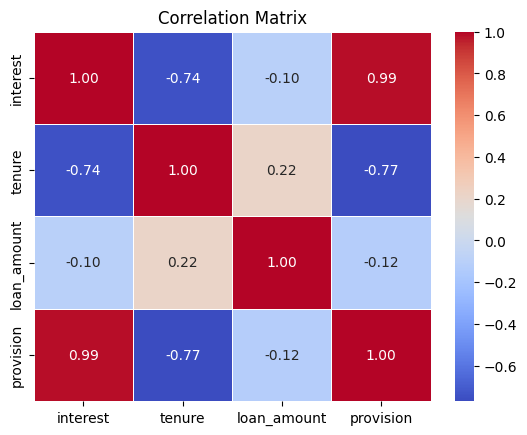

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Interest and Provision:

There is a very high positive correlation of about 0.99 between the interest rate and provision costs. This indicates that an increase or decrease in the interest rate will be strongly followed by a similar change in the provision cost, and vice versa.

Tenure and Interest:

The correlation between tenure and interest is -0.74, indicating a strong negative relationship. This means that the longer the contract term, the lower the interest rate, and vice versa.

Tenure and Provision:

The correlation between tenure and provision is -0.77, indicating a moderately strong negative relationship. This indicates that the longer the tenure of the contract, the lower the provision costs tend to be, or vice versa.

Loan Amount and Provision:

The correlation between loan_amount and provision is -0.12, indicating a weak negative relationship. This indicates that an increase in loan amount is not significantly associated with an increase in provision costs.

Overall, these correlation results give an idea of how these variables relate to each other in the dataset. It is important to note that correlation does not imply causation, only a linear relationship between the variables.

##**CONLUSION**##





• The 6-month tenure has the smallest percentage of on-time payments, while the 3-month tenure has the highest percentage of on-time payments.

• The 3 month tenor is the tenor with the largest percentage of on-time payments

• Based on the visualization using a violin plot, it can be concluded that contracts with 'Active' status show a wider variation in loan amounts. On the other hand, completed contracts tend to have smaller loan amounts.

• Further analysis of contract status reveals that 'Active' contracts have a longer duration with a median of 6 months. In contrast, 'Finished' contracts tend to have a shorter duration, with a median of 3 months, indicating that most completed contracts have a shorter duration.

• The majority of contracts have an interest of less than 100,000.

• Customer segmentation includes 801 Non-Payers, 204 Good Payers, and 82 Late Payers.

• In the segment of non-payers, the average tenure is 5 months.